In [4]:
import numpy as np
import matplotlib.pyplot as plt

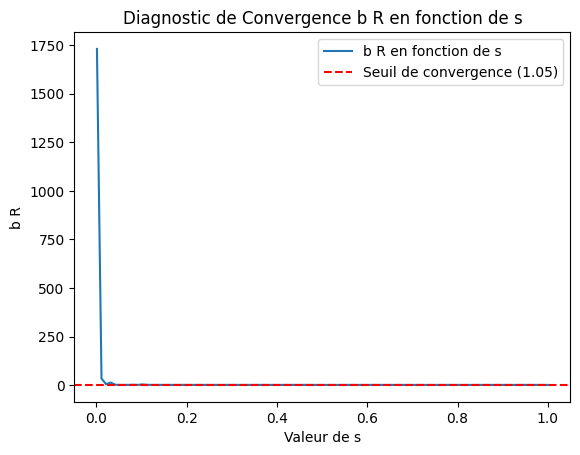

In [5]:
# Partie 1(a) : Simulation avec l'algorithme Metropolis-Hastings

# Définir la distribution cible f(x)
def target_distribution(x):
    return 0.5 * np.exp(-np.abs(x))

# Algorithme Metropolis-Hastings
def metropolis_hastings(N, s, initial_value):
    x_values = [initial_value]

    for i in range(1, N):
        # Simuler un nombre aléatoire x* à partir de la distribution normale
        x_star = np.random.normal(loc=x_values[-1], scale=s)

        # Calculer le ratio r
        ratio = target_distribution(x_star) / target_distribution(x_values[-1])

        # Générer un nombre aléatoire u de la distribution uniforme
        u = np.random.uniform(0, 1)

        # Mise à jour de x_i selon le critère Metropolis-Hastings
        if np.log(u) < np.log(ratio):
            x_values.append(x_star)
        else:
            x_values.append(x_values[-1])

    return x_values

# Partie 1(b) : Diagnostic de Convergence bR

# Fonction pour calculer le diagnostic de convergence b R
def calculate_bR(chains):
    J = len(chains)
    N = len(chains[0])

    # Calcul des statistiques pour chaque chaîne
    Mj_values = np.mean(chains, axis=1)
    Vj_values = np.var(chains, axis=1)

    # Calcul des statistiques globales
    W = np.mean(Vj_values)
    M = np.mean(Mj_values)
    B = np.mean((Mj_values - M)**2)

    # Calcul de b R
    bR = (B + W) / W

    return bR

# Partie 1(c) : Exploration de b R sur une grille de s

# Paramètres
N = 2000
s_values = np.linspace(0.001, 1, 100)
J = 4

# Générer plusieurs chaînes pour différentes valeurs de s
bR_values = []

for s in s_values:
    chains = [metropolis_hastings(N, s, np.random.normal()) for _ in range(J)]
    bR = calculate_bR(np.array(chains))
    bR_values.append(bR)

# Tracer la dépendance de b R en fonction de s
plt.plot(s_values, bR_values, label='b R en fonction de s')
plt.axhline(y=1.05, color='r', linestyle='--', label='Seuil de convergence (1.05)')
plt.xlabel('Valeur de s')
plt.ylabel('b R')
plt.title('Diagnostic de Convergence b R en fonction de s')
plt.legend()
plt.show()